# A basic analysis of Polymath 1

### Preliminaries
We start with the html from http://michaelnielsen.org/polymath1/index.php?title=Polymath1#Threads_and_further_problems (the wiki) with the list of all threads for Polymath 1.

In [1]:
PM1THREADS = '<h2><span class="mw-headline" id="Threads_and_further_problems">Threads and further problems</span></h2> <ul> <li> <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/01/27/is-massively-collaborative-mathematics-possible/">Is massively collaborative mathematics possible?</a> (inactive) </li> <li> (1-199) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/02/01/a-combinatorial-approach-to-density-hales-jewett/">A combinatorial approach to density Hales-Jewett</a> (inactive) </li> <li> (200-299) <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/02/05/upper-and-lower-bounds-for-the-density-hales-jewett-problem/">Upper and lower bounds for the density Hales-Jewett problem</a> (inactive) </li> <li> (300-399) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/02/06/dhj-the-triangle-removal-approach/">The triangle-removal approach</a> (inactive) </li> <li> (400-499) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/02/08/dhj-quasirandomness-and-obstructions-to-uniformity">Quasirandomness and obstructions to uniformity</a> (inactive) </li> <li> (500-599) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/02/13/dhj-possible-proof-strategies/#more-441/">Possible proof strategies</a> (inactive) </li> <li> (600-699) <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/02/11/a-reading-seminar-on-density-hales-jewett/">A reading seminar on density Hales-Jewett</a> (inactive) </li> <li> (700-799) <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/02/13/bounds-for-the-first-few-density-hales-jewett-numbers-and-related-quantities/">Bounds for the first few density Hales-Jewett numbers, and related quantities</a> (inactive) </li> <li> (800-849) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/02/23/brief-review-of-polymath1/">Brief review of polymath1</a> (inactive) </li> <li> (850-899) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/03/02/dhj3-851-899/">DHJ(3): 851-899</a> (inactive) </li> <li> (900-999) <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/03/04/dhj3-900-999-density-hales-jewett-type-numbers/">DHJ(3): 900-999 (Density Hales-Jewett type numbers)</a> (inactive) </li> <li> (1000-1049) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/03/10/problem-solved-probably/">Problem solved (probably)</a> (inactive) </li> <li> <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/03/10/polymath1-and-open-collaborative-mathematics/">Polymath1 and open collaborative mathematics</a> (inactive) </li> <li> (1050-1099) <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/03/16/dhj3-and-related-results-1050-1099/">DHJ(3) and related results: 1050-1099</a> (inactive) </li> <li> (1100-1199) <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/03/14/dhj3-1100-1199-density-hales-jewett-type-numbers/">DHJ(3): 1100-1199 (Density Hales-Jewett type numbers)</a> (inactive) </li> <li>(discussion) <a rel="nofollow" class="external text" href="http://gilkalai.wordpress.com/2009/03/25/an-open-discussion-and-polls-around-roths-theorem/">An Open Discussion and Polls: Around Roth’s Theorem</a> (inactive) </li> <li> (1200-1299) <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/03/30/dhjk-1200-1299-density-hales-jewett-type-numbers/">DHJ(k): 1200-1299 (Density Hales-Jewett type numbers)</a> (inactive) </li> <li> <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/05/22/dhj-writing-the-second-paper/">DHJ: writing the second paper</a> (inactive) </li> <li> <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/06/14/dhj-still-writing-the-second-paper/">DHJ: still writing the second paper</a> (inactive) </li> <li> <a rel="nofollow" class="external text" href="http://gowers.wordpress.com/2009/06/25/dhj-write-up-and-other-matters/">DHJ write-up and other matters</a> (inactive) </li> <li> <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2009/07/09/dhj-writing-the-second-paper-iii/">DHJ: writing the second paper III.</a> (inactive) </li> <li> <a rel="nofollow" class="external text" href="http://terrytao.wordpress.com/2010/01/15/density-hales-jewett-and-moser-numbers-nearing-the-final-draft">DHJ and Moser numbers: nearing the final draft.</a> (<b>active</b>) </li> </ul>'

In [2]:
import yaml
import matplotlib.pyplot as plt

with open("settings.yaml", "r") as settings_file:
    SETTINGS = yaml.safe_load(settings_file.read())                              
    CMAP = eval(SETTINGS['cmap'])                                                    
                                                                                 
with open("author_convert.yaml", "r") as convert_file:
    CONVERT = yaml.safe_load(convert_file.read())

#### Where are the discussion-threads?
The code below parses the html, creates a two ordered dictd with urls of the threads as keys, and the types of threads (on which blog) as values.
(this matters because all threads need dedicated parsers)

`URLS_ALL` has all threads, `URLS_RESEARCH` only the research threads. 

Finally, the content of `URLS_RESEARCH` is printed.

In [3]:
from collections import OrderedDict
from bs4 import BeautifulSoup
from urlparse import urlparse

from comment_thread import *
from author_network import *

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)


SOUP = BeautifulSoup(PM1THREADS)
ITEMS = SOUP.find("ul").find_all("li")
URLS_ALL = OrderedDict(((item.find("a").get("href"), None) for item in ITEMS))
URLS_RESEARCH = OrderedDict(((item.find("a").get("href"), None) for item in ITEMS if item.text.startswith(" (")))

print "This is the list of research-threads for Polymath 1"
print "==================================================="
for key in URLS_RESEARCH.iterkeys():
    URLS_RESEARCH[key] = urlparse(key).netloc[:-14].title()
    print key#, URLS_RESEARCH[key]

This is the list of research-threads for Polymath 1
http://gowers.wordpress.com/2009/02/01/a-combinatorial-approach-to-density-hales-jewett/
http://terrytao.wordpress.com/2009/02/05/upper-and-lower-bounds-for-the-density-hales-jewett-problem/
http://gowers.wordpress.com/2009/02/06/dhj-the-triangle-removal-approach/
http://gowers.wordpress.com/2009/02/08/dhj-quasirandomness-and-obstructions-to-uniformity
http://gowers.wordpress.com/2009/02/13/dhj-possible-proof-strategies/#more-441/
http://terrytao.wordpress.com/2009/02/11/a-reading-seminar-on-density-hales-jewett/
http://terrytao.wordpress.com/2009/02/13/bounds-for-the-first-few-density-hales-jewett-numbers-and-related-quantities/
http://gowers.wordpress.com/2009/02/23/brief-review-of-polymath1/
http://gowers.wordpress.com/2009/03/02/dhj3-851-899/
http://terrytao.wordpress.com/2009/03/04/dhj3-900-999-density-hales-jewett-type-numbers/
http://gowers.wordpress.com/2009/03/10/problem-solved-probably/
http://gowers.wordpress.com/2009/03/16

### Creating network-structures: individual threads
We now create the ordered dict `THREADS` with urls from `URLS_RESEARCH` as keys, and CommentThread objects as values.

Progress is printed out.

In [4]:
THREADS = OrderedDict()
print 'Processing:',
for url, blog in URLS_RESEARCH.iteritems():
    print '>',
    THREADS[url] = eval("CommentThread{}(\"{}\")".format(blog, url))
print "\n", "Processing complete. {} threads added to the multithread".format(len(THREADS))

Processing: > > > > > > > > > > > > > > 
Processing complete. 14 threads added to the multithread


### Creating network-structures: merging threads and creating interaction network between participants
We now create the MultiCommentThread object `PM1_MTHREAD` using `THREADS`, and the AuthorNetwork object `PM1_NETWORK` object using `PM1_MTHREAD`.

`PM1_MTHREAD` can be used to visualise and analyse the structure of discussion-threads. `PM1_NETWORK` can be used to visualise and analyse the activity of and interaction between the different participants in the multiple threads.

In [5]:
PM1_MTHREAD = MultiCommentThread(*THREADS.values())
PM1_NETWORK = AuthorNetwork(PM1_MTHREAD)

## Start with the analysis: a first graph
A first thing we can do is to draw the structure of the discussion.

The x-axis is the level of the comment, and the y-axis is the timeline. (Because inline plits are smaller, the value for the time intervals listed on the y-axis is set to 50)

Nodes are comments, with the color indicating the author of the comment, and the shape indicating the blog where the comment was made. 

**Remark for PolyMath 1:** In the early threads nested comments were impossible, and *ad hoc* markers were used to signal if a comment replied to a previous comment. This structure is not yet revealed in this graph.

Show labels? (default = no) 


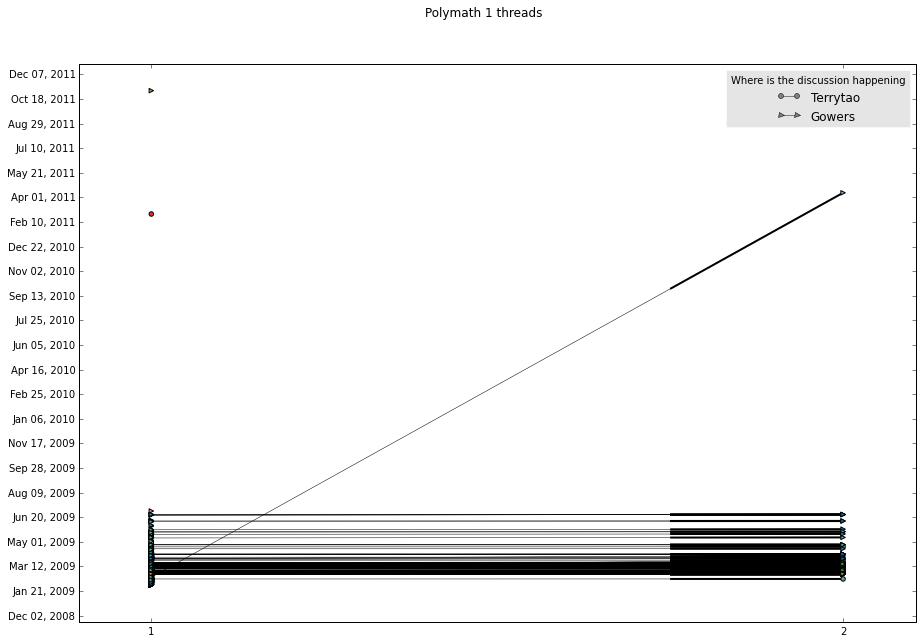

In [6]:
PM1_MTHREAD.draw_graph(title="Polymath 1 threads", time_intervals=50)

#### Inspecting individual comments
We can also *inspect* individual comments. We lookup the id's of the first 5 comments, and print out a report for each.

In [ ]:
for comment in PM1_MTHREAD.graph.nodes()[:5]:
    print comment
    print yaml.safe_dump(PM1_MTHREAD.comment_report(comment))

But we can also directly print all the information we have about a particular comment.

In [ ]:
PM1_MTHREAD.print_nodes('comment-3356')

### Moving to the author interaction
The interaction-graph has discussion-participants as nodes, and interactions as weighted directed edges.

Show labels? (default = yes) 


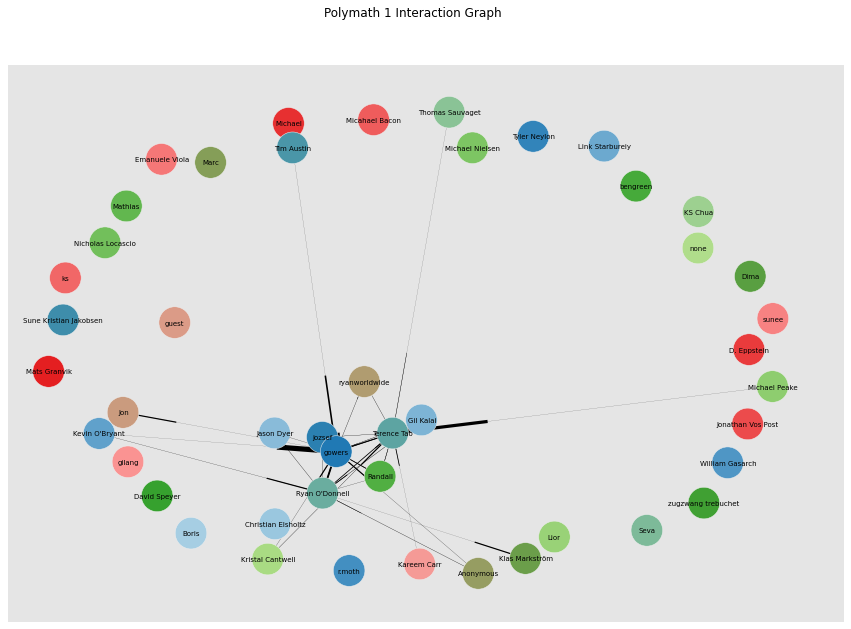

In [7]:
PM1_NETWORK.draw_graph(title="Polymath 1 Interaction Graph")

Further analysis can be caried out withing the networkx library, or in Gephi after exporting the network.

In [ ]:
PM1_NETWORK.plot_author_count(y_intervals=20)

In [ ]:
PM1_MTHREAD.plot_activity("author", max_span = timedelta(150), time_intervals=8)

Here too we can inspect individual authors.

In [ ]:
PM1_MTHREAD.plot_activity("thread", delta=timedelta(1), max_span = timedelta(150), time_intervals=1)

In [ ]:
print "Terence Tao"
print "==========="
for key, value in PM1_NETWORK.author_report('Terence Tao').iteritems():
    print key, ': ', value

Basic network analysis is also implemented. We can for instance return the weakly connected components.

In [ ]:
COMPONENTS = PM1_NETWORK.w_connected_components()

print "Main component"
print "=============="
for author in next(COMPONENTS):
    print author
print "=============="
the_next = next(COMPONENTS)
if len(the_next) <=1:
    print "All other components are singletons"
    print "example: {}".format(the_next)

### Looking at communities and sub-communities
We can also look at how the group of participants differs between the different blogs, or at how it evolves over time.

In [ ]:
from matplotlib_venn import venn2, venn3

GOWERS = set().union(*[thread.authors for thread in THREADS.values() if thread.__class__ is CommentThreadGowers])
TAO = set().union(*[thread.authors for thread in THREADS.values() if thread.__class__ is CommentThreadTerrytao])
GOWERS_LST = [thread.authors for thread in THREADS.values() if thread.__class__ is CommentThreadGowers]
TAO_LST = [thread.authors for thread in THREADS.values() if thread.__class__ is CommentThreadTerrytao]

plt.figure()
plt.subplot(221)
venn2([GOWERS, TAO], set_labels = ['Gowers', 'Terry Tao'])
plt.title('Participants in Gowers and Tao Blog')
plt.subplot(223)
venn3([GOWERS_LST[0], GOWERS_LST[len(GOWERS_LST)/2], GOWERS_LST[-1]], set_labels = ['Start', 'Halfway', 'End'])
plt.title('Evolution on Gowers Blog')
plt.subplot(224)
venn3([TAO_LST[0], TAO_LST[len(TAO_LST)/2], TAO_LST[-1]], set_labels = ['Start', 'Halfway', 'End'])
plt.title('Evolution on Tao Blog')
plt.show()

List authors by threads in which they participate